# Zeitscheiben
Kartierung im GIS

| | Phase |
| ----- | ---------------- |
| EIA_I | Early Iron Age I |
| EIA_II | Early Iron Age II |
| EIA_III | Early Iron Age III |
| MIA | Middle Iron Age |
| LIA_I | Late Iron Age I |
| LIA_II | Late Iron Age II |
| LIA_III | Late Iron Age III |

In [72]:
%matplotlib inline
from IPython.display import display
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import sqlite3

import sys, os
sys.path.append("/Python")
from myfunctions import *
from parula import *

con = sqlite3.connect("../data/CongoDB.sqlite")

## Mastertabelle mit allen Fpl. & Stilgruppen

In [46]:
sql = """SELECT
       t_Obj.objID,
       't_Ort'.'Kat-Nr',
       't_Ort'.'ort_name' || ' (Fpl. ' || 't_ort'.'Kat-Nr' || ')' AS Ort,
       t_Obj.Typ,
       t_Ort.y_lat AS Y, 
       t_Ort.x_long AS X
   FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
       INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
   WHERE (((t_Ort.ort_lit) = 'DS')
       AND (t_Obj.Typ != '')
       AND (t_Obj.Typ NOT LIKE '%/%')
       AND (t_Obj.Typ NOT LIKE '% (?)%'))""".replace('\n',' ')

nwc = pd.read_sql(sql, con)

nwc['x'] = 1

nwc = nwc.pivot_table(values = 'x', index = ['Ort', 'X', 'Y'], columns = 'Typ').reset_index()
nwc.head()

Typ,Ort,X,Y,BAN,BBL,BBS,BDG,BKW,BOG,BOT,...,MDB,MKA,MKL,MPB,MTB,NGB,NGO,OUE,PDM,PKM
0,Balongoi (Fpl. 214),18.644374,4.129969,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,Bangui (Fpl. 215),18.553721,4.352572,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Batanga (Fpl. 209),18.594438,3.710706,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,Bobangi (Fpl. 189),17.722248,-0.108898,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Bobulu (Fpl. 198),18.042886,1.441145,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Inneres Kongobecken (Wotzka 1995)

Sequenz für das ICB:

In [47]:
icb = pd.read_csv('../lit/Wotzka1995_Sequenz.csv', encoding='Latin1', index_col=2)

# x'e durch 1'er ersetzen:
icb.ix[:,8:44] = icb.ix[:,8:44].replace('x', 1)
icb = icb.reset_index()
icb = icb.rename(columns={'Name':'Ort'})
icb = icb.set_index(['Ort', 'X', 'Y'])

icb = icb.ix[:,6:44]
icb = icb.reset_index()

icb.head()

,Ort,X,Y,IMB,BON,IGD,ING,LOK,MON,LUS,...,"Ubangi-Ngiri-""Import""",BKN,LIK,BLM,LKG,NKB,IKE,ILB,YOP,LSL
0,Bondongo-Losombo,"18,661187","-1,012556",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Bongongo,"18,72677","-0,794161",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Bikoro,"18,126623","-0,736957",NaN,NaN,NaN,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Mbeke,"18,683283","-0,250149",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Bokenyola,"18,64359","-0,312474",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
# >> MASTERTABELLE AUS NWC & ICB!!! mit concat

m = pd.concat([nwc, icb])
c = list(m)

m = m.set_index(['Ort', 'X', 'Y'])
m = m.reset_index()

m.to_csv('../data/processed/4_ZeitScheibe_NWC-ICB.csv', index=False)

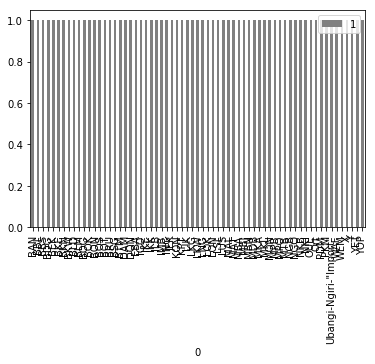

In [84]:
c = pd.DataFrame(c)
c[1] = 1
#c.head()

c.plot(x = 0, y=1, kind = 'bar', color = 'grey')

In [85]:
len(c)

65

In [75]:
c.head()

,0,1
0,BAN,1
1,BBL,1
2,BBS,1
3,BDG,1
4,BEK,1


In [64]:
# Kartierung mit Kreisdiagrammen

In [65]:
m.head()

,Ort,X,Y,BAN,BBL,BBS,BDG,BEK,BKE,BKN,...,NKB,NKI,OUE,PDM,PKM,"Ubangi-Ngiri-""Import""",WAF,WEM,YET,YOP
0,Balongoi (Fpl. 214),18.6444,4.12997,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Bangui (Fpl. 215),18.5537,4.35257,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Batanga (Fpl. 209),18.5944,3.71071,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Bobangi (Fpl. 189),17.7222,-0.108898,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Bobulu (Fpl. 198),18.0429,1.44114,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
